<a href="https://colab.research.google.com/github/TammireddyDeepika/DEMOISTSPROJECT/blob/main/creditcardfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/customer-segmentation-dataset")

print("Path to dataset files:", path)


100%|██████████| 21.8M/21.8M [00:01<00:00, 15.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/customer-segmentation-dataset/versions/1


In [2]:
import pandas as pd
import kagglehub

# Download the dataset using kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Assuming the file is named creditcard.csv inside the downloaded path
file_path = f"{path}/creditcard.csv"

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
    print("\nDataset info:")
    df.info()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the dataset path.")

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Dataset loaded successfully.

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.1755


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class distribution (0: Not Fraud, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64


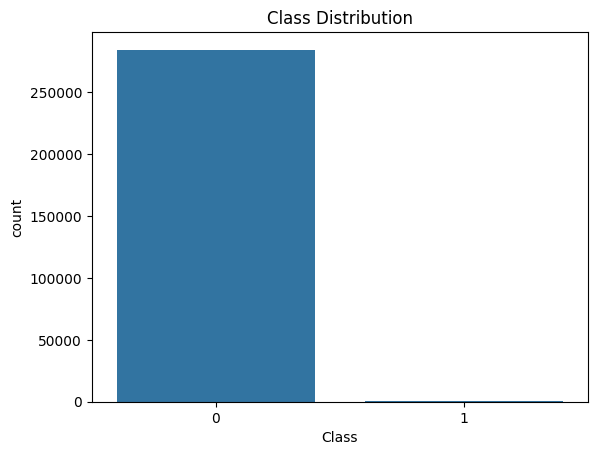


Descriptive statistics for 'Amount' and 'Time':
                Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000


In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get the number of fraudulent and non-fraudulent transactions
print("\nClass distribution (0: Not Fraud, 1: Fraud):")
print(df['Class'].value_counts())

# Visualize the class distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Get a feel for the data's scale
print("\nDescriptive statistics for 'Amount' and 'Time':")
print(df[['Time', 'Amount']].describe())

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nShape of original training data:", X_train.shape)
print("Shape of resampled training data:", X_train_resampled.shape)
print("\nResampled class distribution:")
print(y_train_resampled.value_counts())


Shape of original training data: (199364, 30)
Shape of resampled training data: (398040, 30)

Resampled class distribution:
Class
0    199020
1    199020
Name: count, dtype: int64


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the original test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443


Confusion Matrix:
[[83840  1455]
 [   21   127]]
